# Diabetes Risk Identification and Prediction (DRIP)

# About the Dataset
**Selected Variables Encoding Information**:  https://www.cdc.gov/pcd/issues/2019/19_0109.htm

**Codebook**: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

# Imports

In [240]:
import os
import pandas as pd
from ucimlrepo import fetch_ucirepo

import sweetviz as sv
import math
import pickle
import json

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, Markdown
import re

# Data Acquisition and Loading

In [189]:
data_dir = "data"  # You can change this to your preferred directory
feature_path = os.path.join(data_dir, "cdc_diabetes_data_features.pkl")
target_path = os.path.join(data_dir, "cdc_diabetes_data_targets.pkl")
metadata_path = os.path.join(data_dir, "cdc_diabetes_data_metadata.json")
variables_path = os.path.join(data_dir, "cdc_diabetes_data_variables.pkl")  # Changed to .pkl for pickle

def load_dataset():
    # Ensure the directory exists
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    # Check if the dataset is already downloaded and saved locally
    if not (os.path.exists(feature_path) and os.path.exists(target_path) and 
            os.path.exists(metadata_path) and os.path.exists(variables_path)):
        
        # Assuming fetch_ucirepo is a function that downloads the dataset
        cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
        display(cdc_diabetes_health_indicators.keys())
        
        # Save the features, targets, metadata, and variables locally
        cdc_diabetes_health_indicators.data.features.to_pickle(feature_path)
        cdc_diabetes_health_indicators.data.targets.to_pickle(target_path)
        
        # Serialize metadata using JSON
        metadata = cdc_diabetes_health_indicators.metadata
        with open(metadata_path, 'w') as f:
            json.dump(metadata, f)
        
        # Serialize variables using pickle
        variables = cdc_diabetes_health_indicators.variables
        with open(variables_path, 'wb') as f:
            pickle.dump(variables, f)
        
        print("Downloaded and saved the dataset locally.")
        features = cdc_diabetes_health_indicators.data.features
        targets = cdc_diabetes_health_indicators.data.targets

    else:
        # Load the features, targets, metadata, and variables from local storage
        features = pd.read_pickle(feature_path)
        targets = pd.read_pickle(target_path)
        
        with open(metadata_path, 'r') as f:
            metadata = json.load(f)
        
        with open(variables_path, 'rb') as f:
            variables = pickle.load(f)
        
        print("Loaded dataset from local storage.")

    return features, targets, metadata, variables

# Use the function to load your dataset
X, y, metadata, variables = load_dataset()

# Display metadata and variables to ensure they're correctly loaded
print("Metadata:", metadata)
display("Variables:", variables)


Loaded dataset from local storage.
Metadata: {'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values'

'Variables:'

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


In [190]:
display(X)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [191]:
display(y)

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


# SweetViz


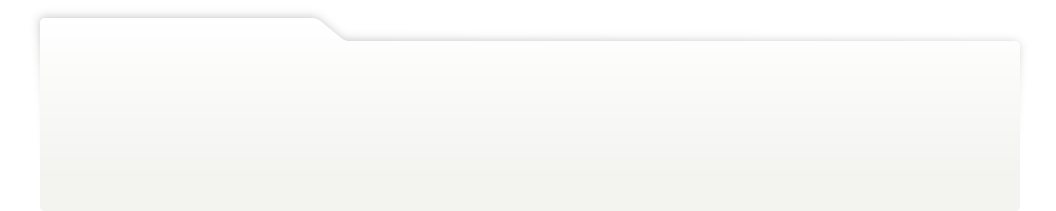
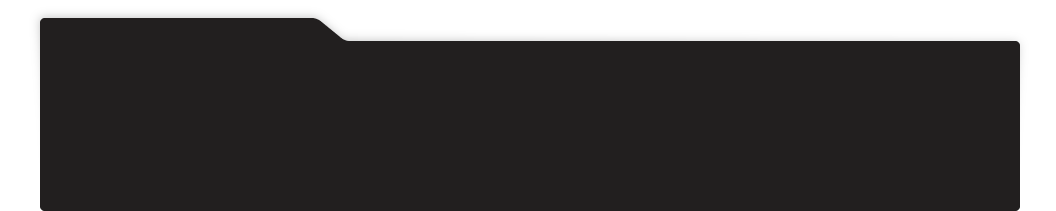
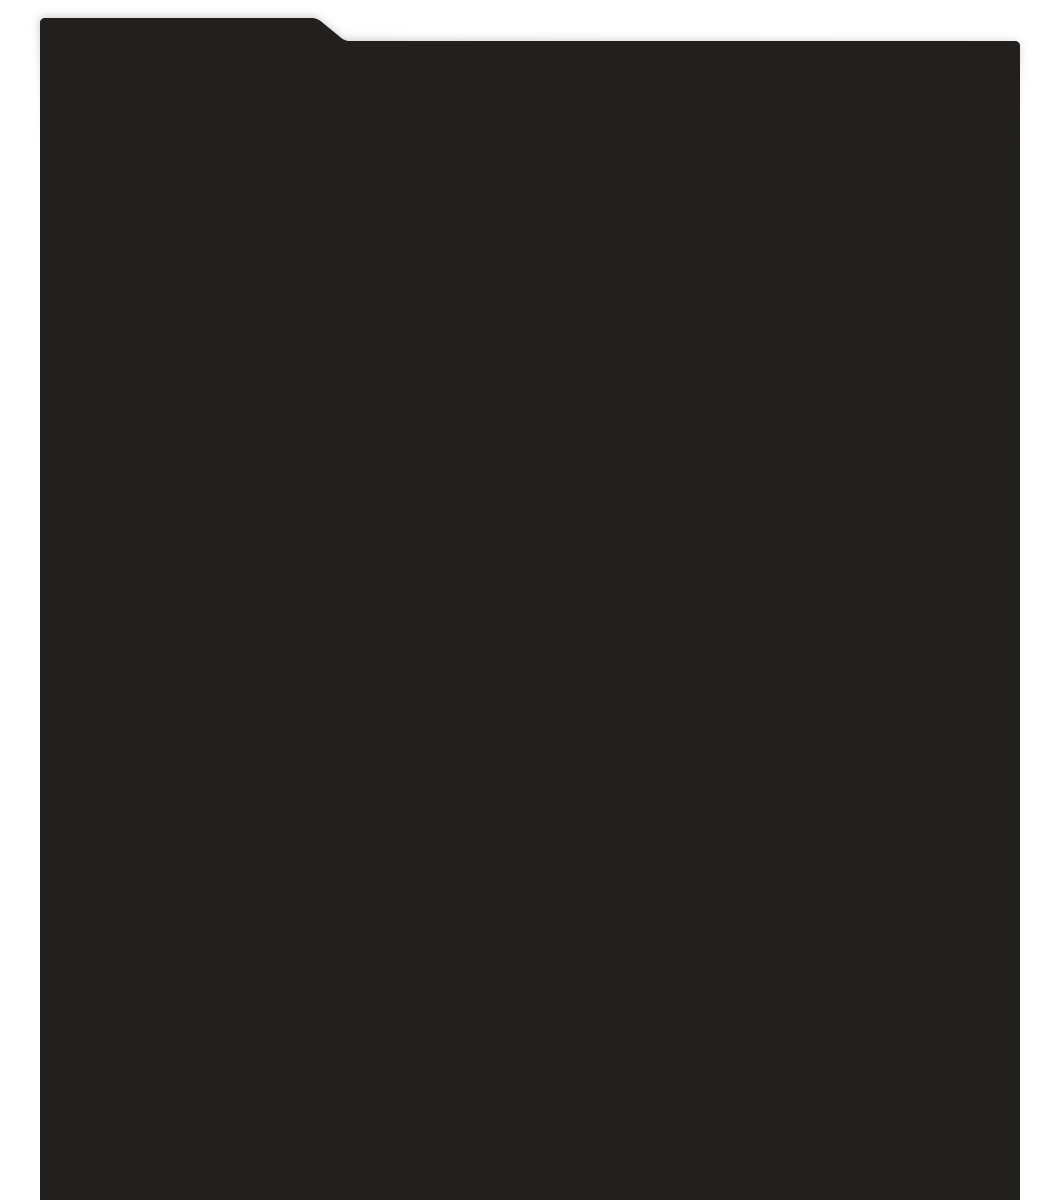
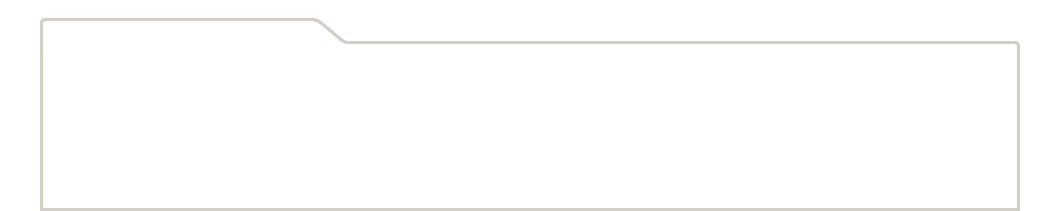
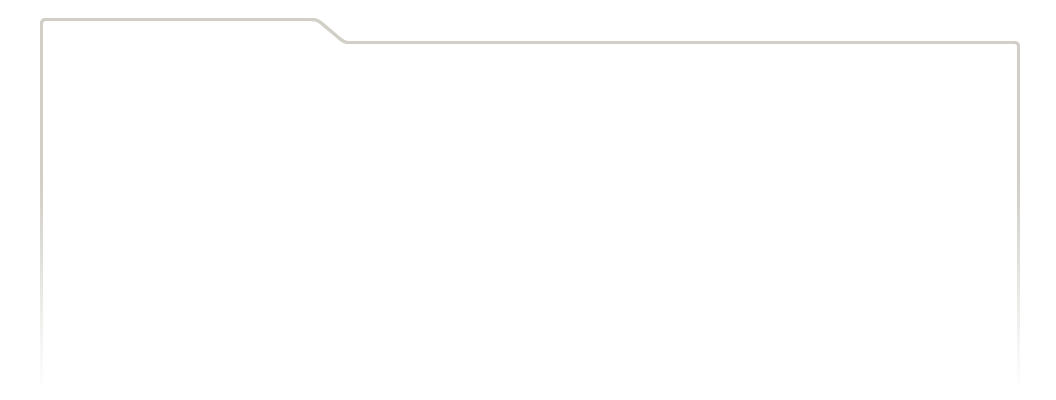
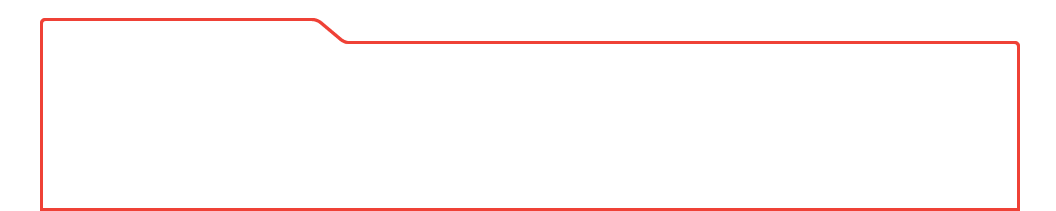
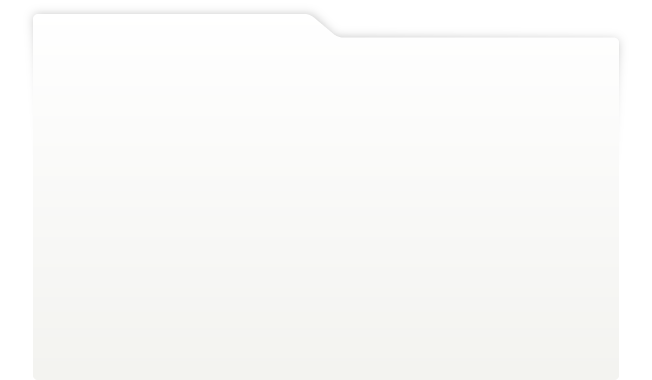
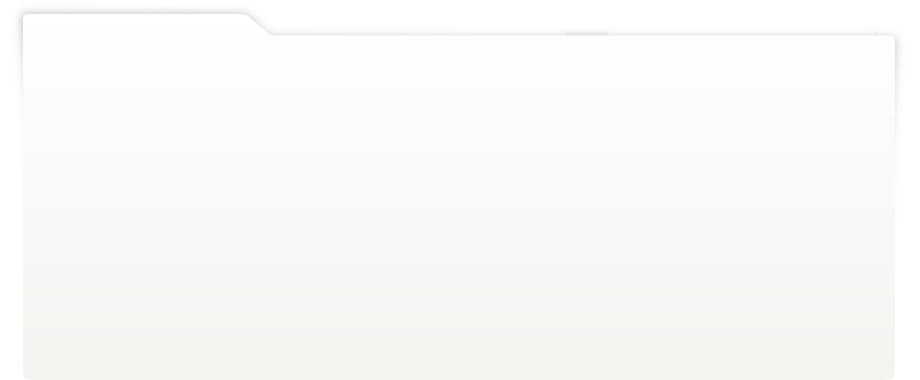
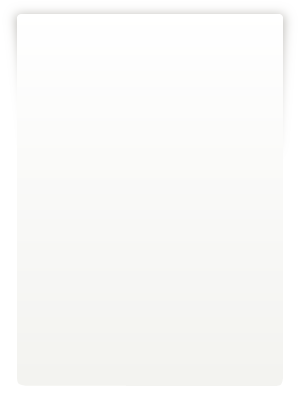
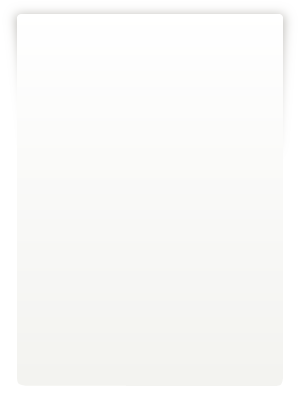
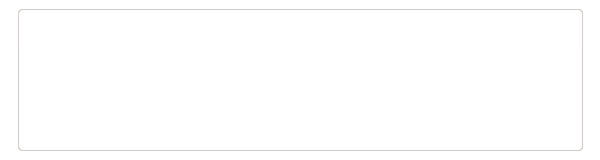
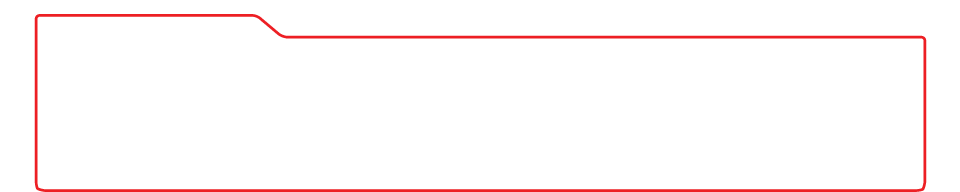
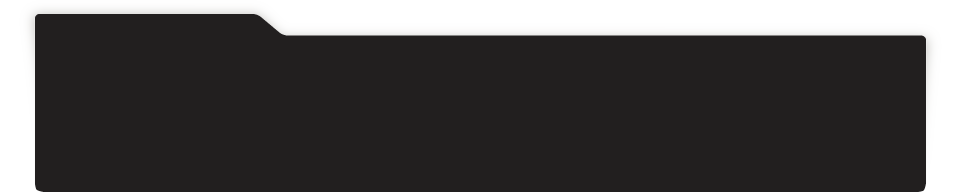
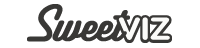
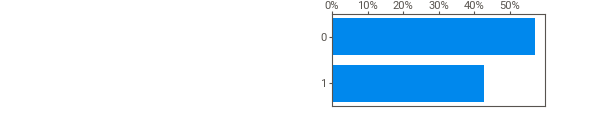
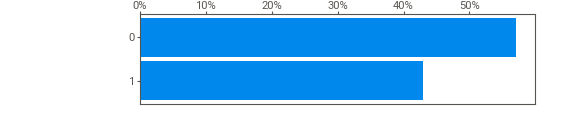
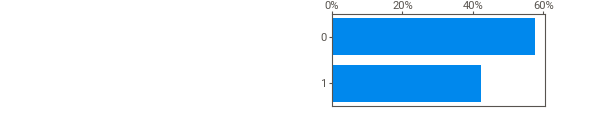
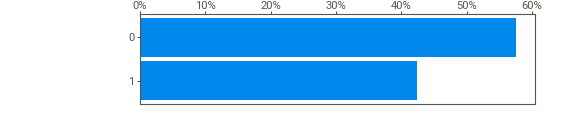
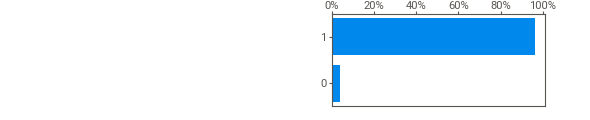
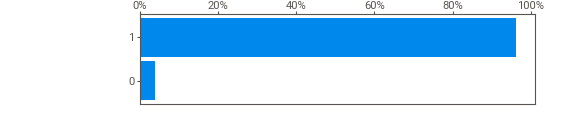
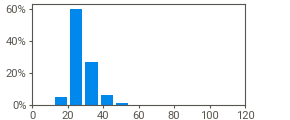
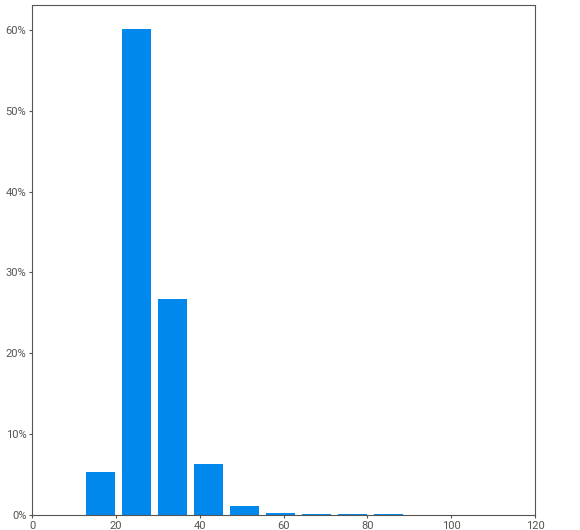
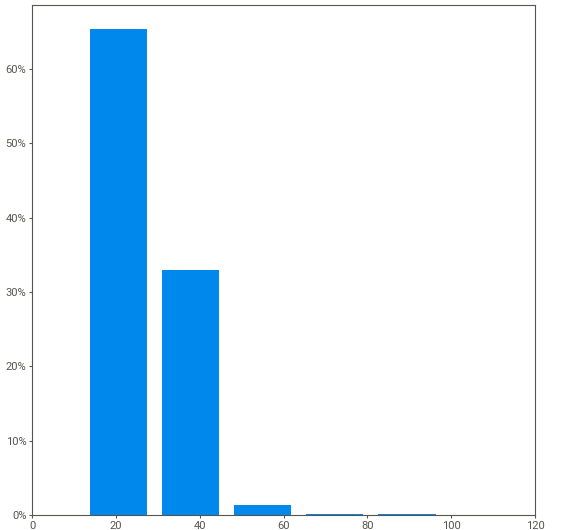
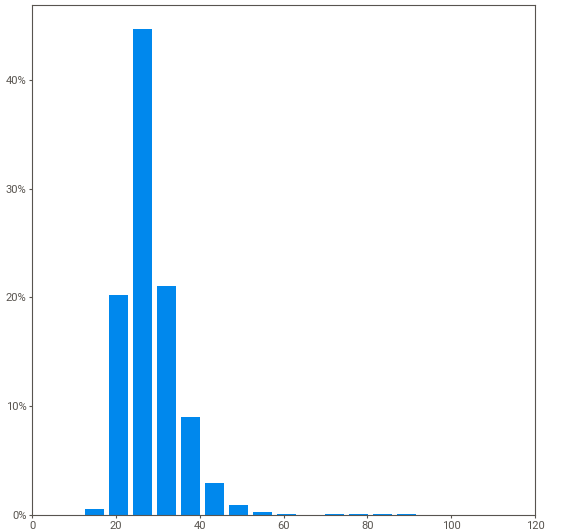
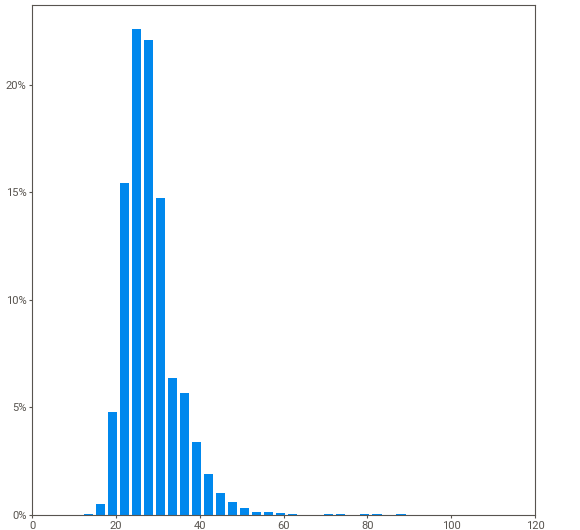
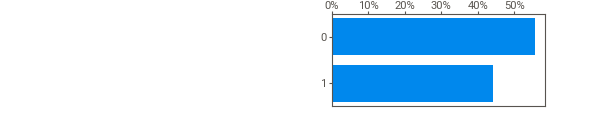
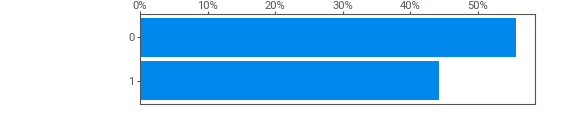
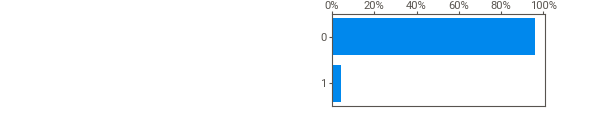
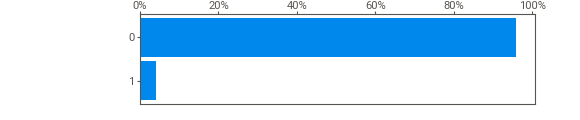
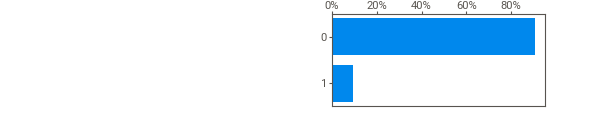
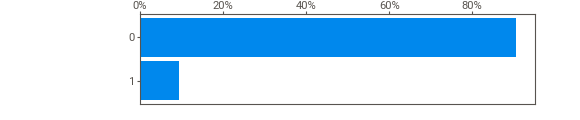
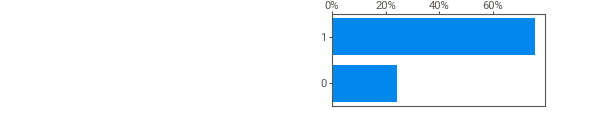
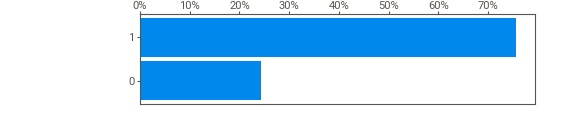
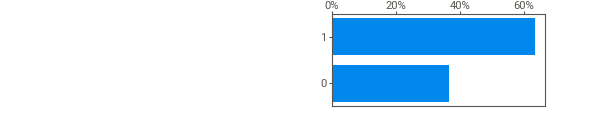
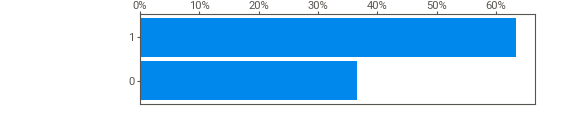
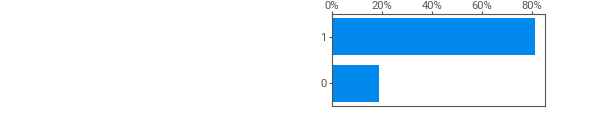
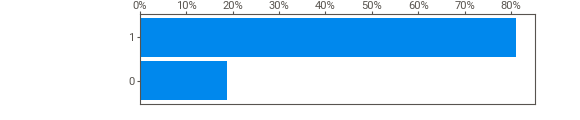
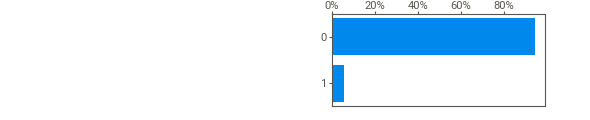
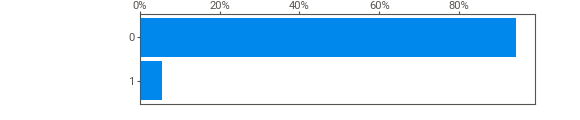
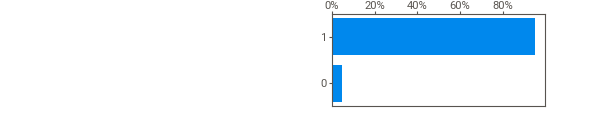
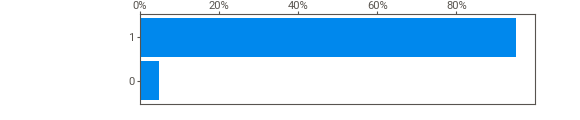
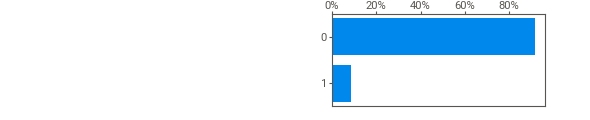
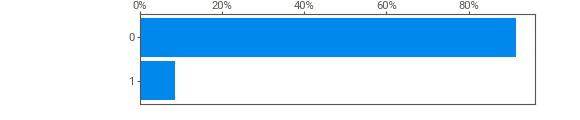
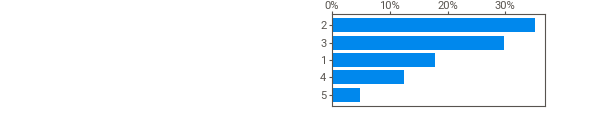
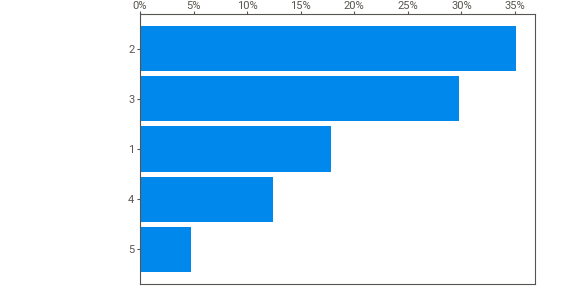
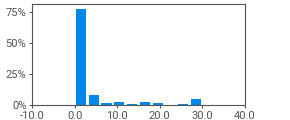
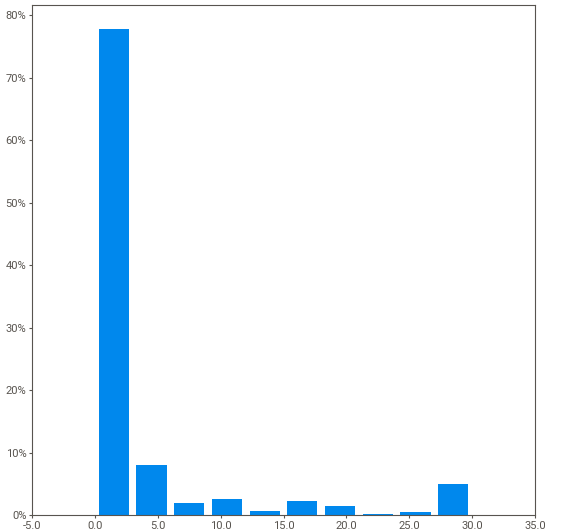
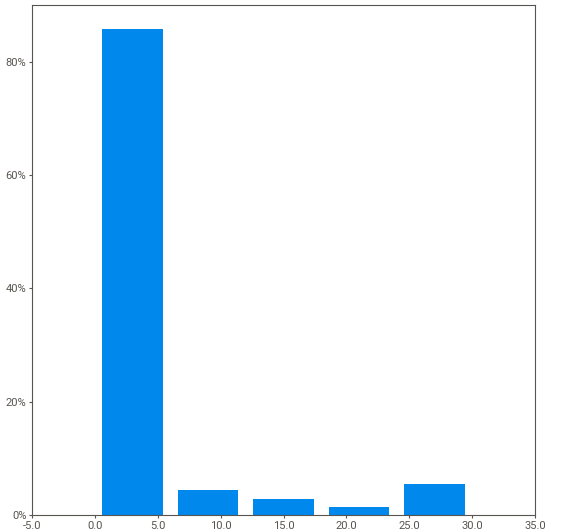
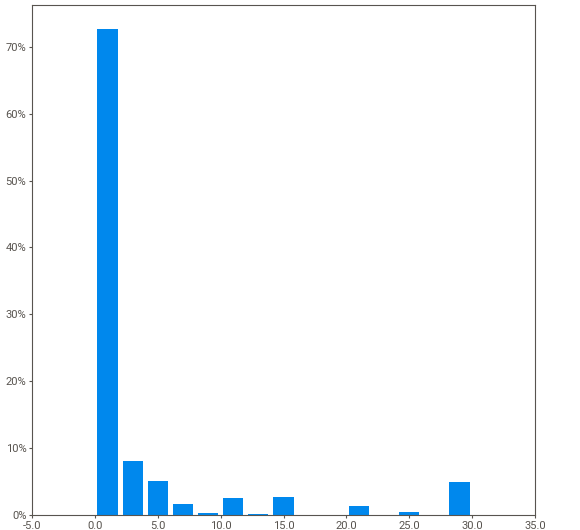
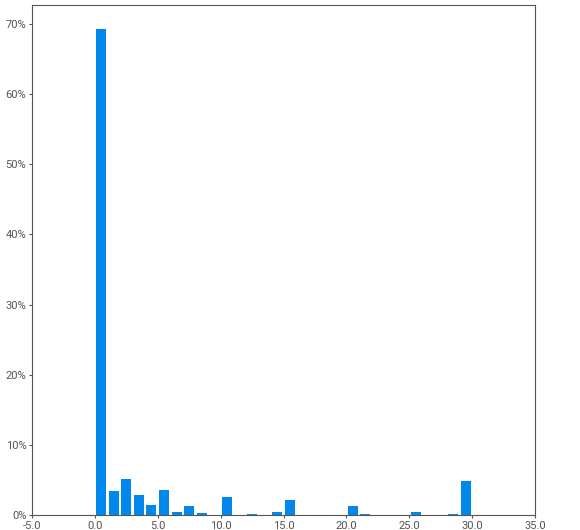
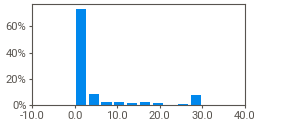
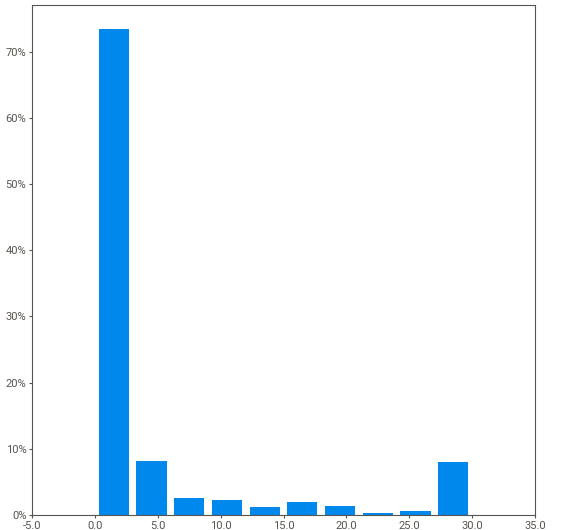
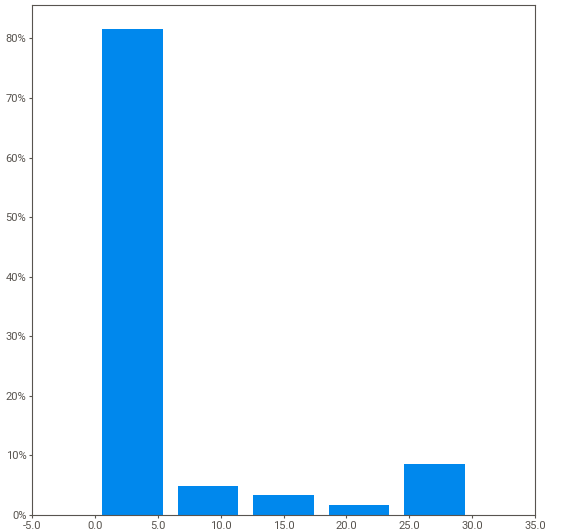
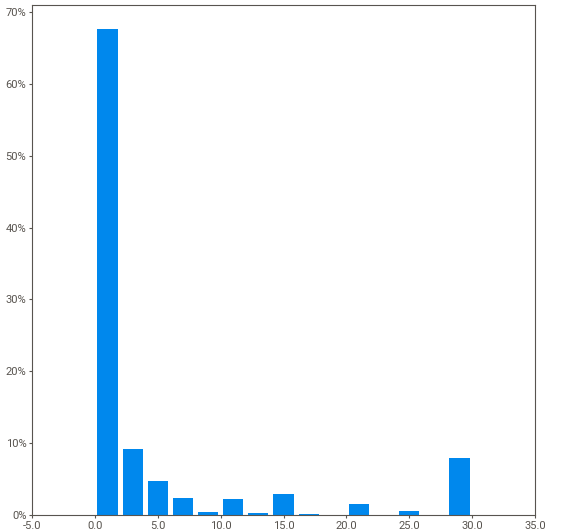
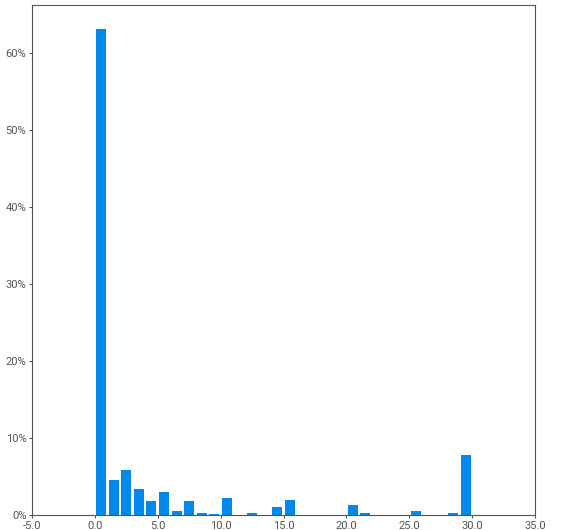
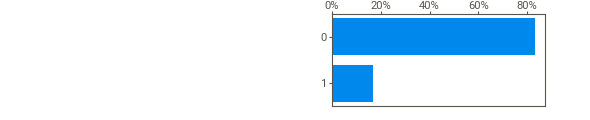
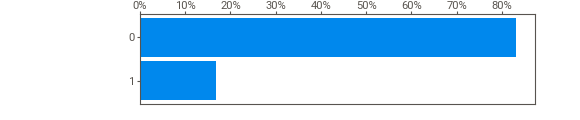
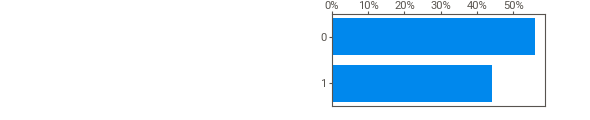
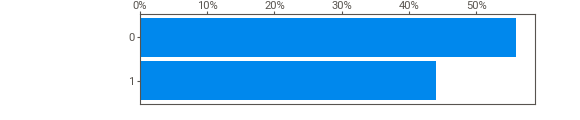
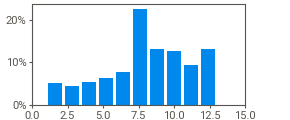
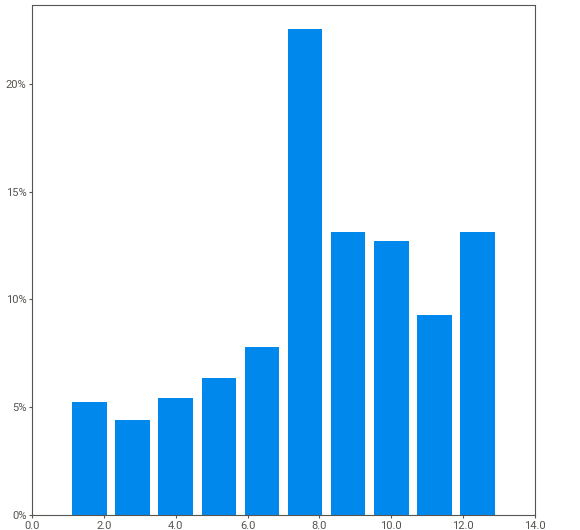
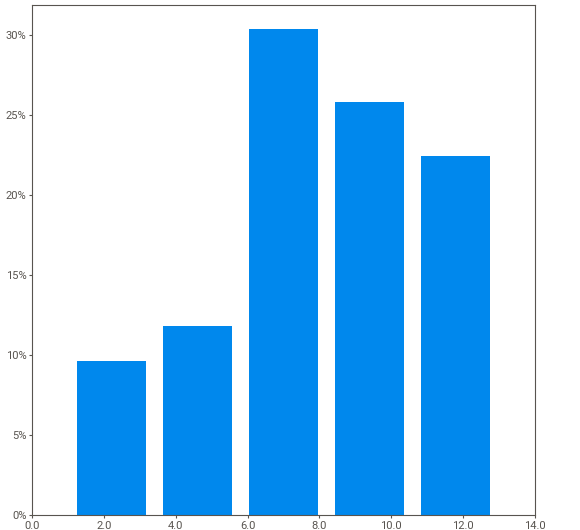
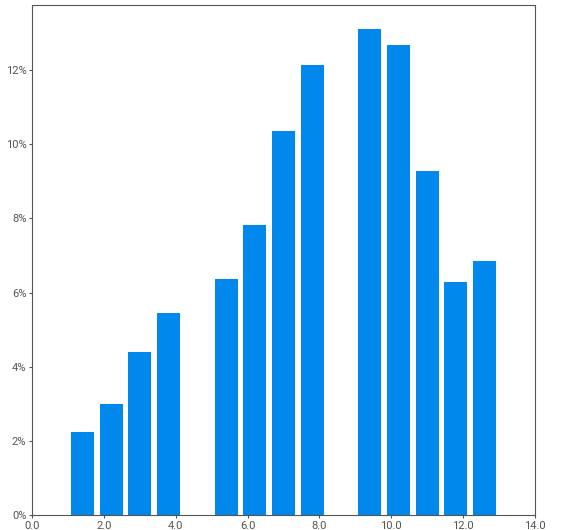
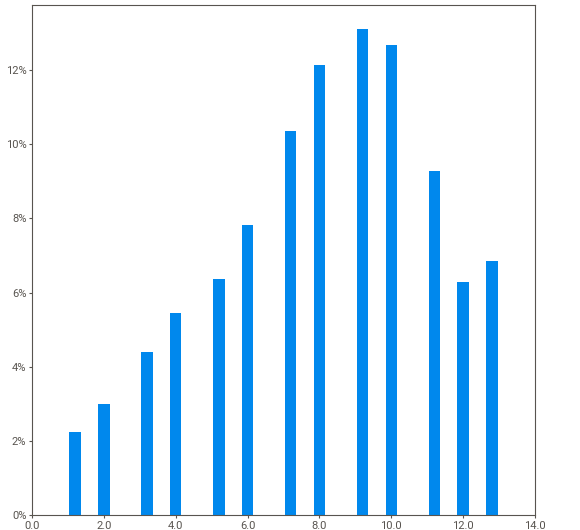
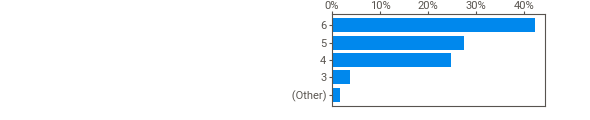
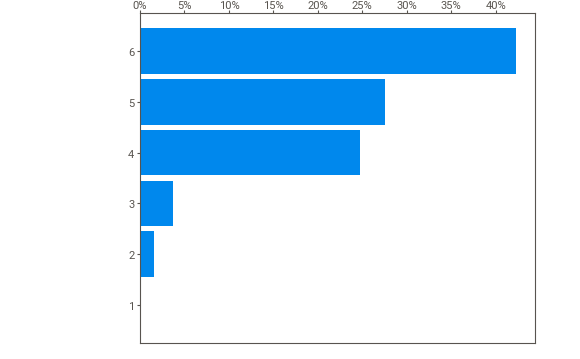
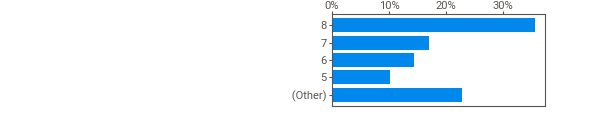
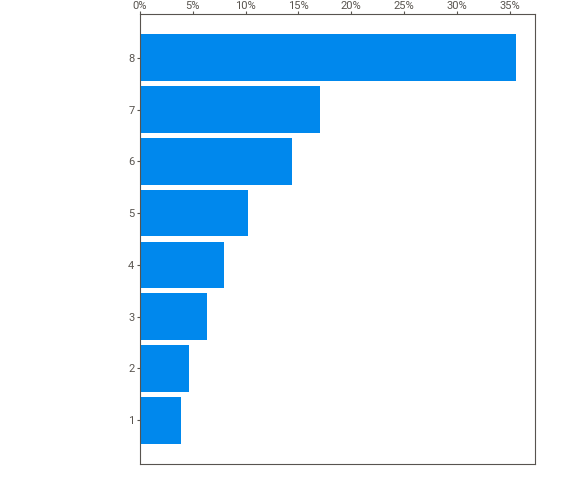
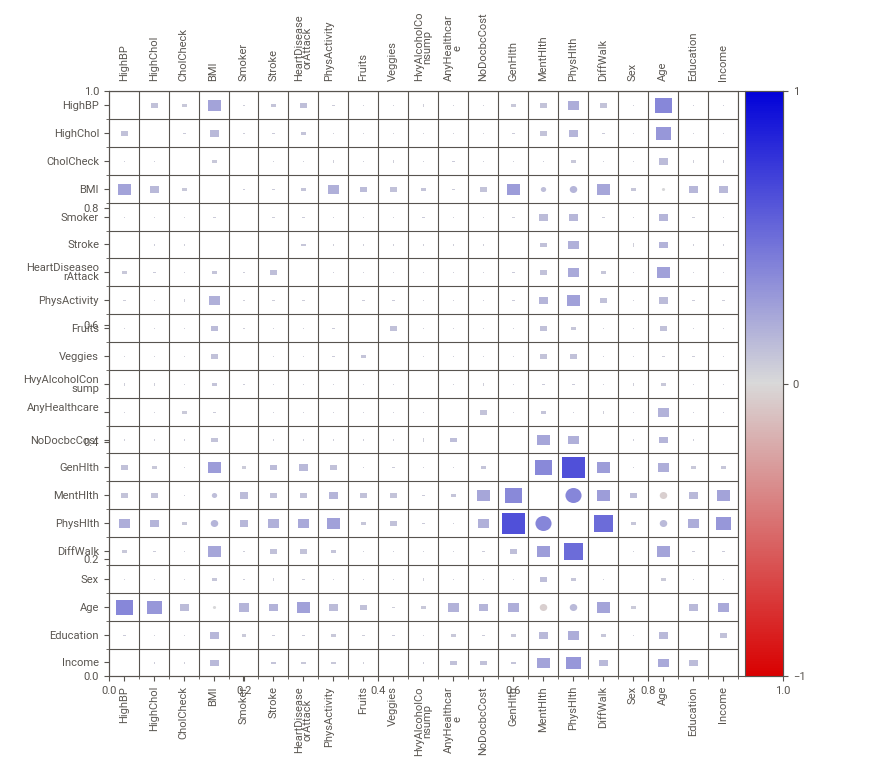
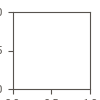

In [192]:
if 'report' not in globals():
    # Generate a Sweetviz report
    report = sv.analyze(X)

# Save the report to an HTML file
#report.show_html("sweetviz_report.html")
report.show_notebook()

# EDA and Data Prep


## Missing Values
There are no missing values!  This will save us a big headache.  

There are some that are less informative though.  (Other) exists in `Income` and `Education`

## Distinct and Data Types
Many values are binary.  Distinct also shows missingness isn't encoded for binary so the missing values really just don't exist.


### Binary
Since I verified they don't have missing this should be an easy check
`HighBP`,
 `HighChol`,
 `CholCheck`,
 `Smoker`,
 `Stroke`,
 `HeartDiseaseorAttack`,
 `PhysActivity`,
 `Fruits`,
 `Veggies`,
 `HvyAlcoholConsump`,
 `AnyHealthcare`,
 `NoDocbcCost`,
 `DiffWalk`,
 `Sex`
 are the binary columns

In [193]:
unique_counts = X.nunique()
bin_cols = unique_counts[unique_counts == 2].index.tolist()
bin_cols

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

### Continuous

`BMI`, `PhysHlth`, `MentHlth`
These columns can't be encoded as anything they just are what they are.

In [194]:
cont_cols = ['BMI','PhysHlth','MentHlth']
cont_cols

['BMI', 'PhysHlth', 'MentHlth']

### Discrete
`GenHlth`, `Age`, `Education`, `Income`
Age was binned so it is discrete here.  Education and Income are categories already encoded.

In [195]:
disc_cols = ['GenHtlh','Age','Education','Income']

### Validate Cols 

In [196]:
all_cols = bin_cols + disc_cols + cont_cols
display(len(all_cols))
if all_cols.sort() == X.columns.to_list().sort():
    print("\n All Columns Categorized")

21


 All Columns Categorized


## Duplicates
Why are there so many duplicate rows?

In [197]:
X[X.duplicated()]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1,1,1,27,1,0,0,0,0,1,...,1,0,5,0,30,1,0,10,4,5
1563,0,0,1,21,1,0,0,1,1,1,...,1,0,1,0,0,0,0,4,6,8
2700,0,0,1,32,0,0,0,1,1,1,...,1,0,2,0,0,0,0,5,6,8
3027,1,0,1,38,0,0,0,1,1,1,...,1,0,3,0,0,0,1,7,6,8
3160,0,0,1,21,0,0,0,1,1,1,...,1,0,1,0,0,0,0,4,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1,1,1,33,0,0,0,1,1,1,...,1,0,3,0,0,0,1,9,6,6
253550,0,0,1,25,0,0,0,1,1,1,...,1,0,1,0,0,0,0,7,6,8
253563,0,1,1,24,1,0,0,1,1,1,...,1,0,2,0,0,0,1,8,6,8
253597,0,0,1,24,0,0,0,1,1,1,...,1,0,2,0,0,0,0,5,6,8


### Statistically Likely?

In [198]:
X.duplicated().sum() / len(X)

0.10159255755282245

10% of rows being duplicate among how many features is how likely?

Lets assume they are all binary to just make the math easy

### Broad Estimate

In [199]:
num_combinations = 1
for column in X.columns:
    distinct_values = X[column].nunique()
    num_combinations *= distinct_values

print(f"Total number of unique combinations possible: {num_combinations:,}")

Total number of unique combinations possible: 4,126,455,889,920


In [200]:
n = len(X)
# Calculating the expected number of duplicates
expected_duplicates = (n * (n - 1)) / (2 * num_combinations)
print(f"Expected number of duplicate rows: {expected_duplicates:,}")

Expected number of duplicate rows: 0.007797646507890773


### There shouldn't be any duplicates but 10% of the dataset has them
The expected duplicates being close to zero strongly indicates that having 10% of the dataset be duplicates is extremely unlikely by chance.  So there has to be another reason.

The duplicates could be for a slew of reasons, such as sampling strategies in surveys, repeated surveys including the same people or errors in aggergating surveys with scripts.

In any case, I should either delete all of them or keep only 1 of each.  Since their data integrity is in quesiton and there's so many rows I can just drop them.

In [201]:
drop_masq = X.duplicated()
y = y[~drop_masq]
X = X[~drop_masq]
X.duplicated().sum()

0

## Data Type Checking

In [202]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227908 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                227908 non-null  int64
 1   HighChol              227908 non-null  int64
 2   CholCheck             227908 non-null  int64
 3   BMI                   227908 non-null  int64
 4   Smoker                227908 non-null  int64
 5   Stroke                227908 non-null  int64
 6   HeartDiseaseorAttack  227908 non-null  int64
 7   PhysActivity          227908 non-null  int64
 8   Fruits                227908 non-null  int64
 9   Veggies               227908 non-null  int64
 10  HvyAlcoholConsump     227908 non-null  int64
 11  AnyHealthcare         227908 non-null  int64
 12  NoDocbcCost           227908 non-null  int64
 13  GenHlth               227908 non-null  int64
 14  MentHlth              227908 non-null  int64
 15  PhysHlth              227908 non-null  

Many of these are boolean but all are in int64 lets fix that

### Binary Cols Should be Boolean

In [203]:
X[bin_cols] = X[bin_cols].astype('bool')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227908 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                227908 non-null  bool 
 1   HighChol              227908 non-null  bool 
 2   CholCheck             227908 non-null  bool 
 3   BMI                   227908 non-null  int64
 4   Smoker                227908 non-null  bool 
 5   Stroke                227908 non-null  bool 
 6   HeartDiseaseorAttack  227908 non-null  bool 
 7   PhysActivity          227908 non-null  bool 
 8   Fruits                227908 non-null  bool 
 9   Veggies               227908 non-null  bool 
 10  HvyAlcoholConsump     227908 non-null  bool 
 11  AnyHealthcare         227908 non-null  bool 
 12  NoDocbcCost           227908 non-null  bool 
 13  GenHlth               227908 non-null  int64
 14  MentHlth              227908 non-null  int64
 15  PhysHlth              227908 non-null  

### max value of int64 checks
We can improve memory usage and computation speed if we lower the values to their sizes

In [204]:
int_cols = X.select_dtypes('int64').columns.to_list()
for col in int_cols:
    print(f"{col} range is {X[col].min()} - {X[col].max()}")

BMI range is 12 - 98
GenHlth range is 1 - 5
MentHlth range is 0 - 30
PhysHlth range is 0 - 30
Age range is 1 - 13
Education range is 1 - 6
Income range is 1 - 8


In [205]:
int_cols

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

### Cast to uint8
They are all less than 255 by a lot, which means uint8 is big enough for them.

In [206]:
cast_dict = {}
for col in int_cols:
    cast_dict[col] = 'uint8'
display(cast_dict)
X = X.astype(cast_dict)
X.info()

{'BMI': 'uint8',
 'GenHlth': 'uint8',
 'MentHlth': 'uint8',
 'PhysHlth': 'uint8',
 'Age': 'uint8',
 'Education': 'uint8',
 'Income': 'uint8'}

<class 'pandas.core.frame.DataFrame'>
Index: 227908 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                227908 non-null  bool 
 1   HighChol              227908 non-null  bool 
 2   CholCheck             227908 non-null  bool 
 3   BMI                   227908 non-null  uint8
 4   Smoker                227908 non-null  bool 
 5   Stroke                227908 non-null  bool 
 6   HeartDiseaseorAttack  227908 non-null  bool 
 7   PhysActivity          227908 non-null  bool 
 8   Fruits                227908 non-null  bool 
 9   Veggies               227908 non-null  bool 
 10  HvyAlcoholConsump     227908 non-null  bool 
 11  AnyHealthcare         227908 non-null  bool 
 12  NoDocbcCost           227908 non-null  bool 
 13  GenHlth               227908 non-null  uint8
 14  MentHlth              227908 non-null  uint8
 15  PhysHlth              227908 non-null  

### Analysis of Casting
great! we went from `memory usage: 38.3 MB` to `memory usage: 6.3 MB` with zero information loss!  Feels great.  This should really help our model training and efficiency overall, as well as let models with special handling of booleans benefit from it!

## Int Cols Distributions and Class Imbalances
I need to analyze the distributions of all the int cols

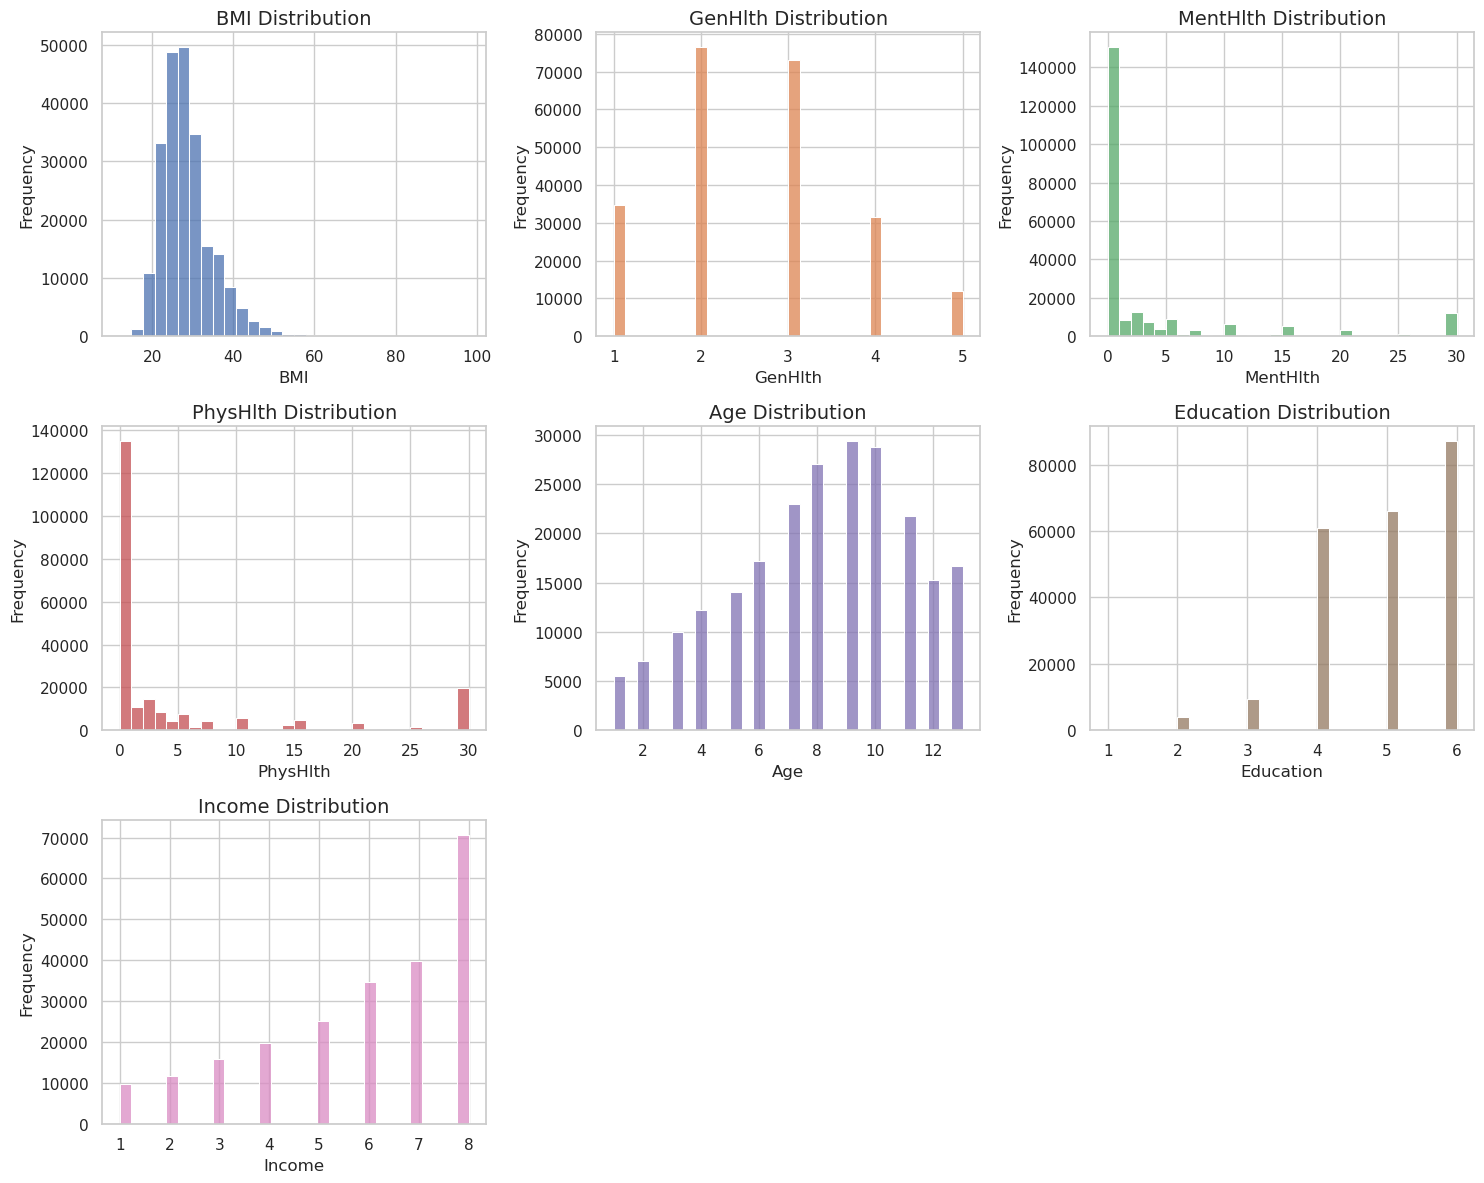

In [207]:
def hist_plot_cols(cols):
    # Set the style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("deep",n_colors=len(cols))

    # Create a grid of plots (3x3 grid to accommodate all the columns)
    n_rows = 3
    n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot histograms for each integer column with different colors
    for i, col in enumerate(cols):
        sns.histplot(X[col], ax=axes[i], kde=False, color=palette[i], bins=30)
        axes[i].set_title(f'{col} Distribution', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
        axes[i].grid(True)

    # Remove any unused subplots (if any)
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()
hist_plot_cols(int_cols)

In [233]:
do_rebins = True

#### BMI
BMI has a skewed distribution, the number of people really overweight are probably outliers.

#### GenHlth
Lets see what the encodings mean

In [208]:
def display_variable_desc(varname):
    # Extract the description of the 'GenHlth' variable
    vardesc = variables[variables['name'] == varname]['description'].values[0]
    # Display it nicely in a notebook using Markdown
    display(Markdown(f"**{varname} Description:**\n\n{vardesc}"))
display_variable_desc('GenHlth')

**GenHlth Description:**

Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

It seems most people rate their health very good or good.  Since this is an encoding the distribution is more of a classification.

#### MentHlth

In [209]:
display_variable_desc('MentHlth')
X['MentHlth'].value_counts(normalize=True).head()

**MentHlth Description:**

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

MentHlth
0     0.661574
2     0.055650
30    0.052999
5     0.039090
1     0.036423
Name: proportion, dtype: float64

66% of people say 0 days of their mental health was not good in the last month.
So a pretty big imbalance.  Consider binning since there's so few people in each bin other than 0.

##### Bin MentHlth

In [210]:
if do_rebins:
    # Create the bins and labels
    bins = [-1, 0, 7, 30]  # -1 to include 0 in its own bin
    labels = [1, 2, 3]  # 1 for 0, then 2, 3, 4 for the other bins

    # Apply the binning to the MentHlth column
    X['MentHlth_binned'] = pd.cut(X['MentHlth'], bins=bins, labels=labels, include_lowest=True)

    # Display the resulting binned column
    print(X[['MentHlth', 'MentHlth_binned']].head())

   MentHlth MentHlth_binned
0        18               3
1         0               1
2        30               3
3         0               1
4         3               2


In [211]:
if do_rebins:
    X['MentHlth_binned'].value_counts(normalize=True).head()

MentHlth_binned
1    0.661574
2    0.197650
3    0.140776
Name: proportion, dtype: float64

I have binned it into 
1: people who have zero mental health issues
2: people who reported 1-7 days with mental health issues in a month
3: people who reported 8-30 days with mental health issues in a month

The reason for this is two fold.  One is class balance, the other is, it's basically very healthy, struggling, and miserable.


##### Drop Unbinned Version

In [212]:
if do_rebins:
    X.drop(columns=['MentHlth'],inplace=True)

#### PhysHlth

In [213]:
display_variable_desc('PhysHlth')
X['PhysHlth'].value_counts(normalize=True).head()

**PhysHlth Description:**

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

PhysHlth
0     0.592599
30    0.085030
2     0.063495
1     0.048533
3     0.036989
Name: proportion, dtype: float64

#### Bin PhysHlth

In [214]:
if do_rebins:
    # Create the bins and labels
    bins = [-1, 0, 7, 30]  # -1 to include 0 in its own bin
    labels = [1, 2, 3]  # 1 for 0, then 2, 3, 4 for the other bins

    # Apply the binning to the PhysHlth column
    X['PhysHlth_binned'] = pd.cut(X['PhysHlth'], bins=bins, labels=labels, include_lowest=True)

    # Display the resulting binned column
    print(X[['PhysHlth', 'PhysHlth_binned']].head())

   PhysHlth PhysHlth_binned
0        15               3
1         0               1
2        30               3
3         0               1
4         0               1


In [215]:
if do_rebins:
    X['PhysHlth_binned'].value_counts(normalize=True).head()

PhysHlth_binned
1    0.592599
2    0.227877
3    0.179524
Name: proportion, dtype: float64

Same reasoning as with Mental Health

#### Drop Unbinned

In [216]:
if do_rebins:
    X.drop(columns=['PhysHlth'],inplace=True)

#### Age

In [217]:
display_variable_desc('Age')
X['Age'].value_counts(normalize=True).head()

**Age Description:**

13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

Age
9     0.129004
10    0.126051
8     0.118807
7     0.100892
11    0.095464
Name: proportion, dtype: float64

Age looks great for our needs.  It is slightly not normal but it's ok.

#### Education

In [218]:
display_variable_desc('Education')
X['Education'].value_counts(normalize=True).head()

**Education Description:**

Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

Education
6    0.382611
5    0.290078
4    0.267283
3    0.041539
2    0.017726
Name: proportion, dtype: float64

1 is an empty class we can just get rid of it

2 and 3 are super small consider binning

4,5, and 6 are fine but we can make this a better encoding by rebinning

##### Rebinning Education

In [219]:
if do_rebins:
    education_mapping = {
        1: 1,  # Combine these three into a single bin
        2: 1,
        3: 1,
        4: 2,  # Keep the original class for 4, 5, and 6, but reassign them to new values
        5: 3,
        6: 4
    }

    # Apply the mapping to the Education column
    X['Education_binned'] = X['Education'].map(education_mapping)

    # Display the resulting binned column
    print(X[['Education', 'Education_binned']].head())

   Education  Education_binned
0          4                 2
1          6                 4
2          4                 2
3          3                 1
4          5                 3


That's better!

In [220]:
if do_rebins:
    X['Education_binned'].value_counts(normalize=True).head()

Education_binned
4    0.382611
3    0.290078
2    0.267283
1    0.060029
Name: proportion, dtype: float64

##### Drop Unbinned

In [221]:
if do_rebins:
    X.drop(columns=['Education'],inplace=True)

#### Income

In [222]:
display_variable_desc('Income')
X['Income'].value_counts(normalize=True)

**Income Description:**

Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

Income
8    0.310046
7    0.174921
6    0.152588
5    0.110782
4    0.087377
3    0.069769
2    0.051560
1    0.042956
Name: proportion, dtype: float64

More imbalances and less meaningful categories.  Lets fix it.

##### Rebin Income

In [223]:
if do_rebins:
    income_mapping = {
        1: 1, 
        2: 1,
        3: 1,
        4: 1, 
        5: 2,
        6: 2,
        7: 3,
        8: 4,
    }

    # Apply the mapping to the income column
    X['Income_binned'] = X['Income'].map(income_mapping)

    # Display the resulting binned column
    print(X[['Income', 'Income_binned']].head())

   Income  Income_binned
0       3              1
1       1              1
2       8              4
3       6              2
4       4              1


##### Eval Rebin

In [224]:
if do_rebins:
    X['Income_binned'].value_counts(normalize=True)

Income_binned
4    0.310046
2    0.263369
1    0.251663
3    0.174921
Name: proportion, dtype: float64

This seems a better grouping, we can now categorize as:
* 1: poverty 
* 2: poor ($35,000)
* 3: mid income
* 4: high income ($75,000+)

##### Drop Unbinned

In [225]:
if do_rebins:
    X.drop(columns=['Income'],inplace=True)

### Fix Datatypes

In [227]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227908 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HighBP                227908 non-null  bool    
 1   HighChol              227908 non-null  bool    
 2   CholCheck             227908 non-null  bool    
 3   BMI                   227908 non-null  uint8   
 4   Smoker                227908 non-null  bool    
 5   Stroke                227908 non-null  bool    
 6   HeartDiseaseorAttack  227908 non-null  bool    
 7   PhysActivity          227908 non-null  bool    
 8   Fruits                227908 non-null  bool    
 9   Veggies               227908 non-null  bool    
 10  HvyAlcoholConsump     227908 non-null  bool    
 11  AnyHealthcare         227908 non-null  bool    
 12  NoDocbcCost           227908 non-null  bool    
 13  GenHlth               227908 non-null  uint8   
 14  DiffWalk              227908 non-null  bo

In [228]:
if do_rebins:
    for col in X.columns:
        if "_binned" in col:
            X[col] = X[col].astype('uint8')
    X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227908 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                227908 non-null  bool 
 1   HighChol              227908 non-null  bool 
 2   CholCheck             227908 non-null  bool 
 3   BMI                   227908 non-null  uint8
 4   Smoker                227908 non-null  bool 
 5   Stroke                227908 non-null  bool 
 6   HeartDiseaseorAttack  227908 non-null  bool 
 7   PhysActivity          227908 non-null  bool 
 8   Fruits                227908 non-null  bool 
 9   Veggies               227908 non-null  bool 
 10  HvyAlcoholConsump     227908 non-null  bool 
 11  AnyHealthcare         227908 non-null  bool 
 12  NoDocbcCost           227908 non-null  bool 
 13  GenHlth               227908 non-null  uint8
 14  DiffWalk              227908 non-null  bool 
 15  Sex                   227908 non-null  

### Replot Histograms

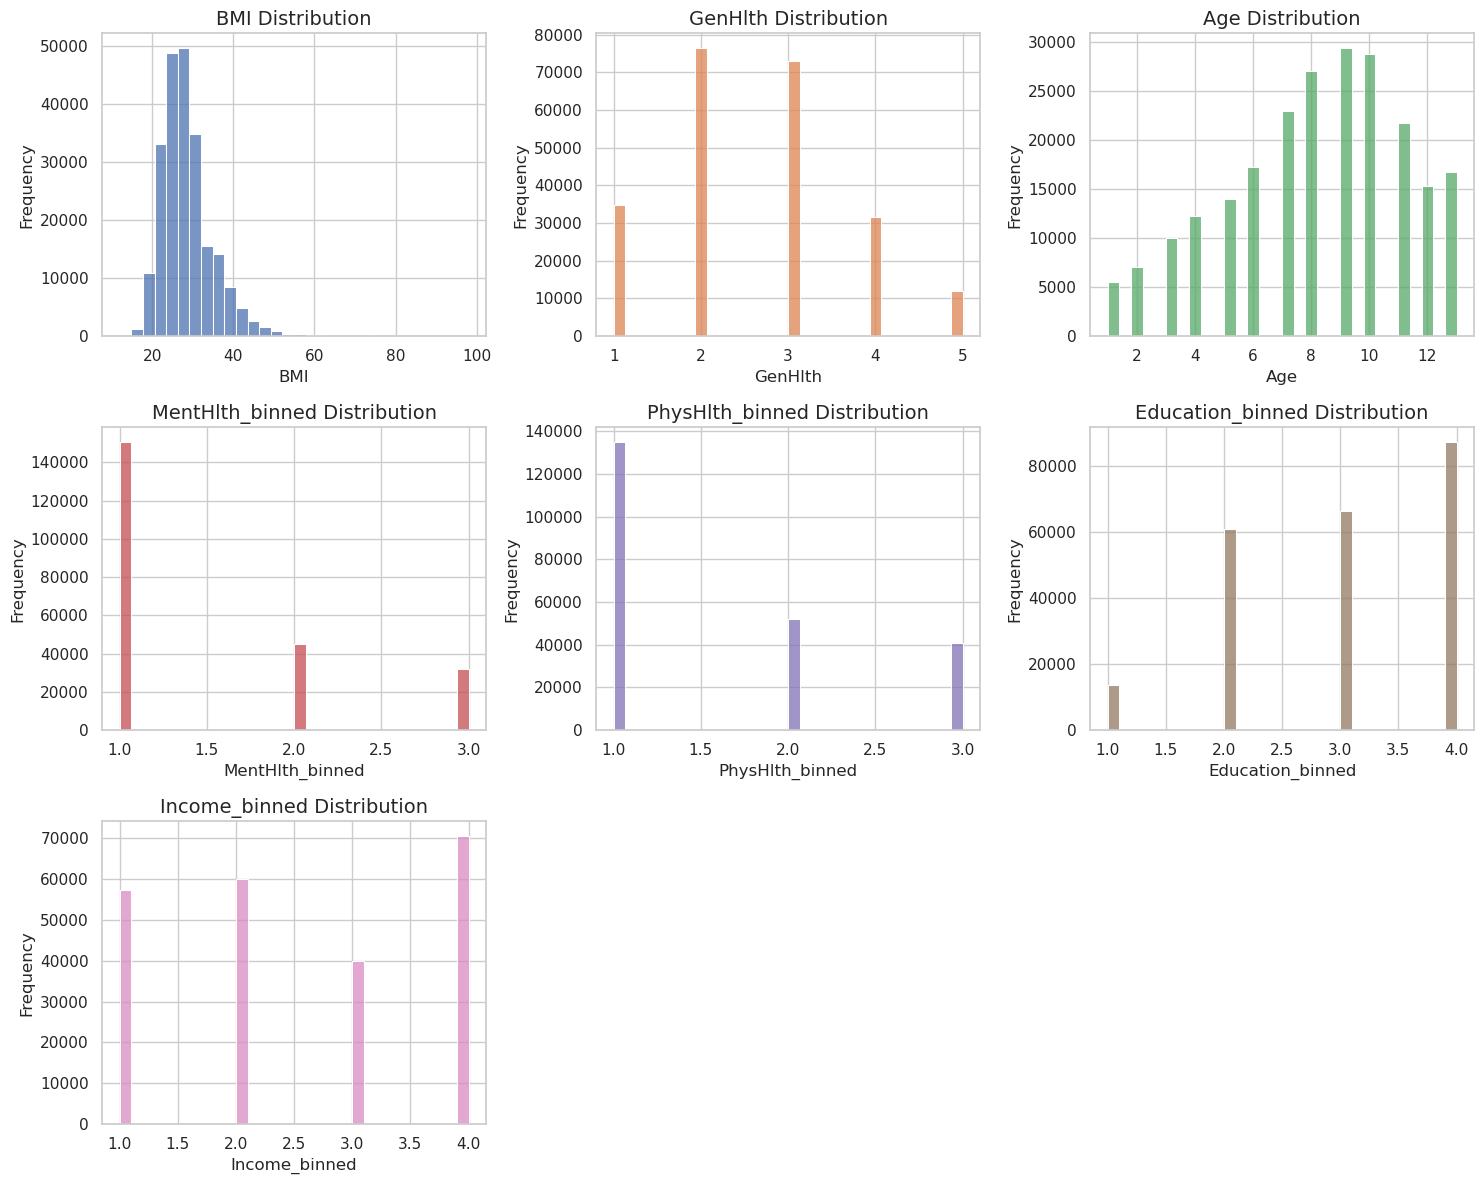

This looks much better for modeling

In [234]:
if do_rebins:
    int_cols_new = X.select_dtypes('uint8').columns.to_list()
    hist_plot_cols(int_cols_new)
    display(Markdown("This looks much better for modeling"))

## Outliers
BMI is the only column I'm worried about outliers lets check it

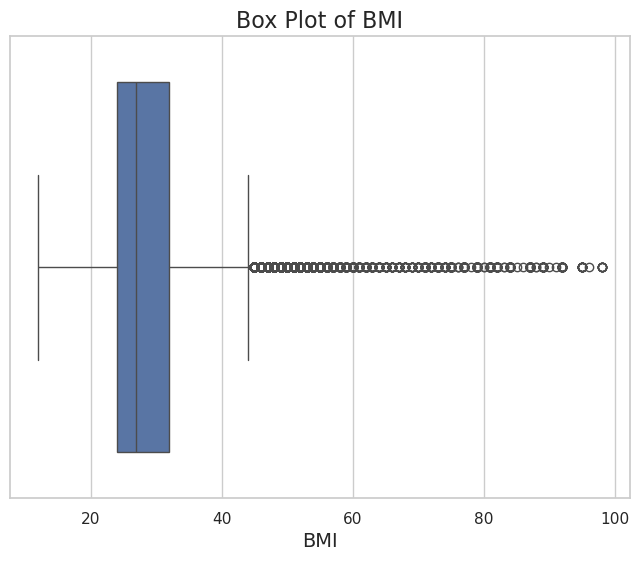

In [232]:
sns.set(style="whitegrid")
palette = sns.color_palette("deep")

# Create the box plot for the 'BMI' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=X['BMI'], color=palette[0])

# Add title and labels for clarity
plt.title('Box Plot of BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)

# Show the plot
plt.show()

Well, I know from domain knowledge that heavy weights are actually pretty important for predicting diabetes so they must stay.

## Binary Class Imbalances

### Extract Labels for True/False Utility Function

In [243]:
# Function to extract labels for binary columns
def extract_labels_for_bin_cols(bin_cols):
    labels = {}
    for col in bin_cols:
        description = variables[variables['name'] == col]['description'].values[0]
        meanings = re.findall(r'(\d) = ([^\d]+?)(?= \d|$)', description)
        false_meaning = meanings[0][1].strip() if len(meanings) > 0 else "False"
        true_meaning = meanings[1][1].strip() if len(meanings) > 1 else "True"
        labels[col] = (false_meaning, true_meaning)
    return labels

In [244]:
binary_labels = extract_labels_for_bin_cols(bin_cols)

### Plot Binary Class Balances

In [274]:
def plot_binary_class_balances(bin_cols):
    # Set the style with a more widely available font and a light blue background
    sns.set(style="whitegrid", font="DejaVu Sans", rc={"axes.facecolor": "#EAF2F8", "figure.facecolor": "#EAF2F8"})
    custom_palette = ["#E1D7C6","#4A90E2"]  # Medical light blue and gray
    
    # Calculate the number of rows needed based on the number of columns
    n_cols = 3  # Three plots per row
    n_rows = (len(bin_cols) + n_cols - 1) // n_cols  # Ceiling division to determine rows
    
    # Create a figure to hold all subplots
    plt.figure(figsize=(18, n_rows * 6))
    
    # Iterate through each binary column
    for i, col in enumerate(bin_cols):
        plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each binary column
        
        # Calculate the proportion of each class
        value_counts = X[col].value_counts(normalize=True).sort_index()
        
        # Get the actual labels from the global binary_labels variable
        false_label, true_label = binary_labels[col]
        labels = [false_label, true_label]
        
        # Create a DataFrame for plotting
        plot_data = pd.DataFrame({
            'Label': labels,
            'Proportion': value_counts.values,
            'Category': labels
        })
        
        # Create a bar plot with the actual labels using hue and palette
        sns.barplot(x='Label', y='Proportion', hue='Category', data=plot_data,
                    palette=custom_palette, dodge=False, edgecolor=".2", linewidth=1.5)
        
        # Add title and labels
        plt.title(f'Class Balance for {col}', fontsize=16, fontweight='bold')
        plt.xlabel('', fontsize=12)
        plt.ylabel('Proportion', fontsize=12)
        plt.ylim(0, 1.05)  # Set y-axis to go slightly above 1 to prevent percentage overlap
        # Adjust x-tick labels for size and weight
        plt.xticks(fontsize=12, fontweight='bold')
        
        # Display the percentages on the bars with padding to avoid bleeding
        for index, value in enumerate(value_counts.values):
            plt.text(index, value + 0.02, f'{value:.2%}', ha='center', fontsize=12, color='black', fontweight='bold')

    # Adjust layout to prevent overlap
    plt.tight_layout(pad=2.0)  # Add padding around the subplots

    # Show the plot
    plt.show()

### Binary Class Balances

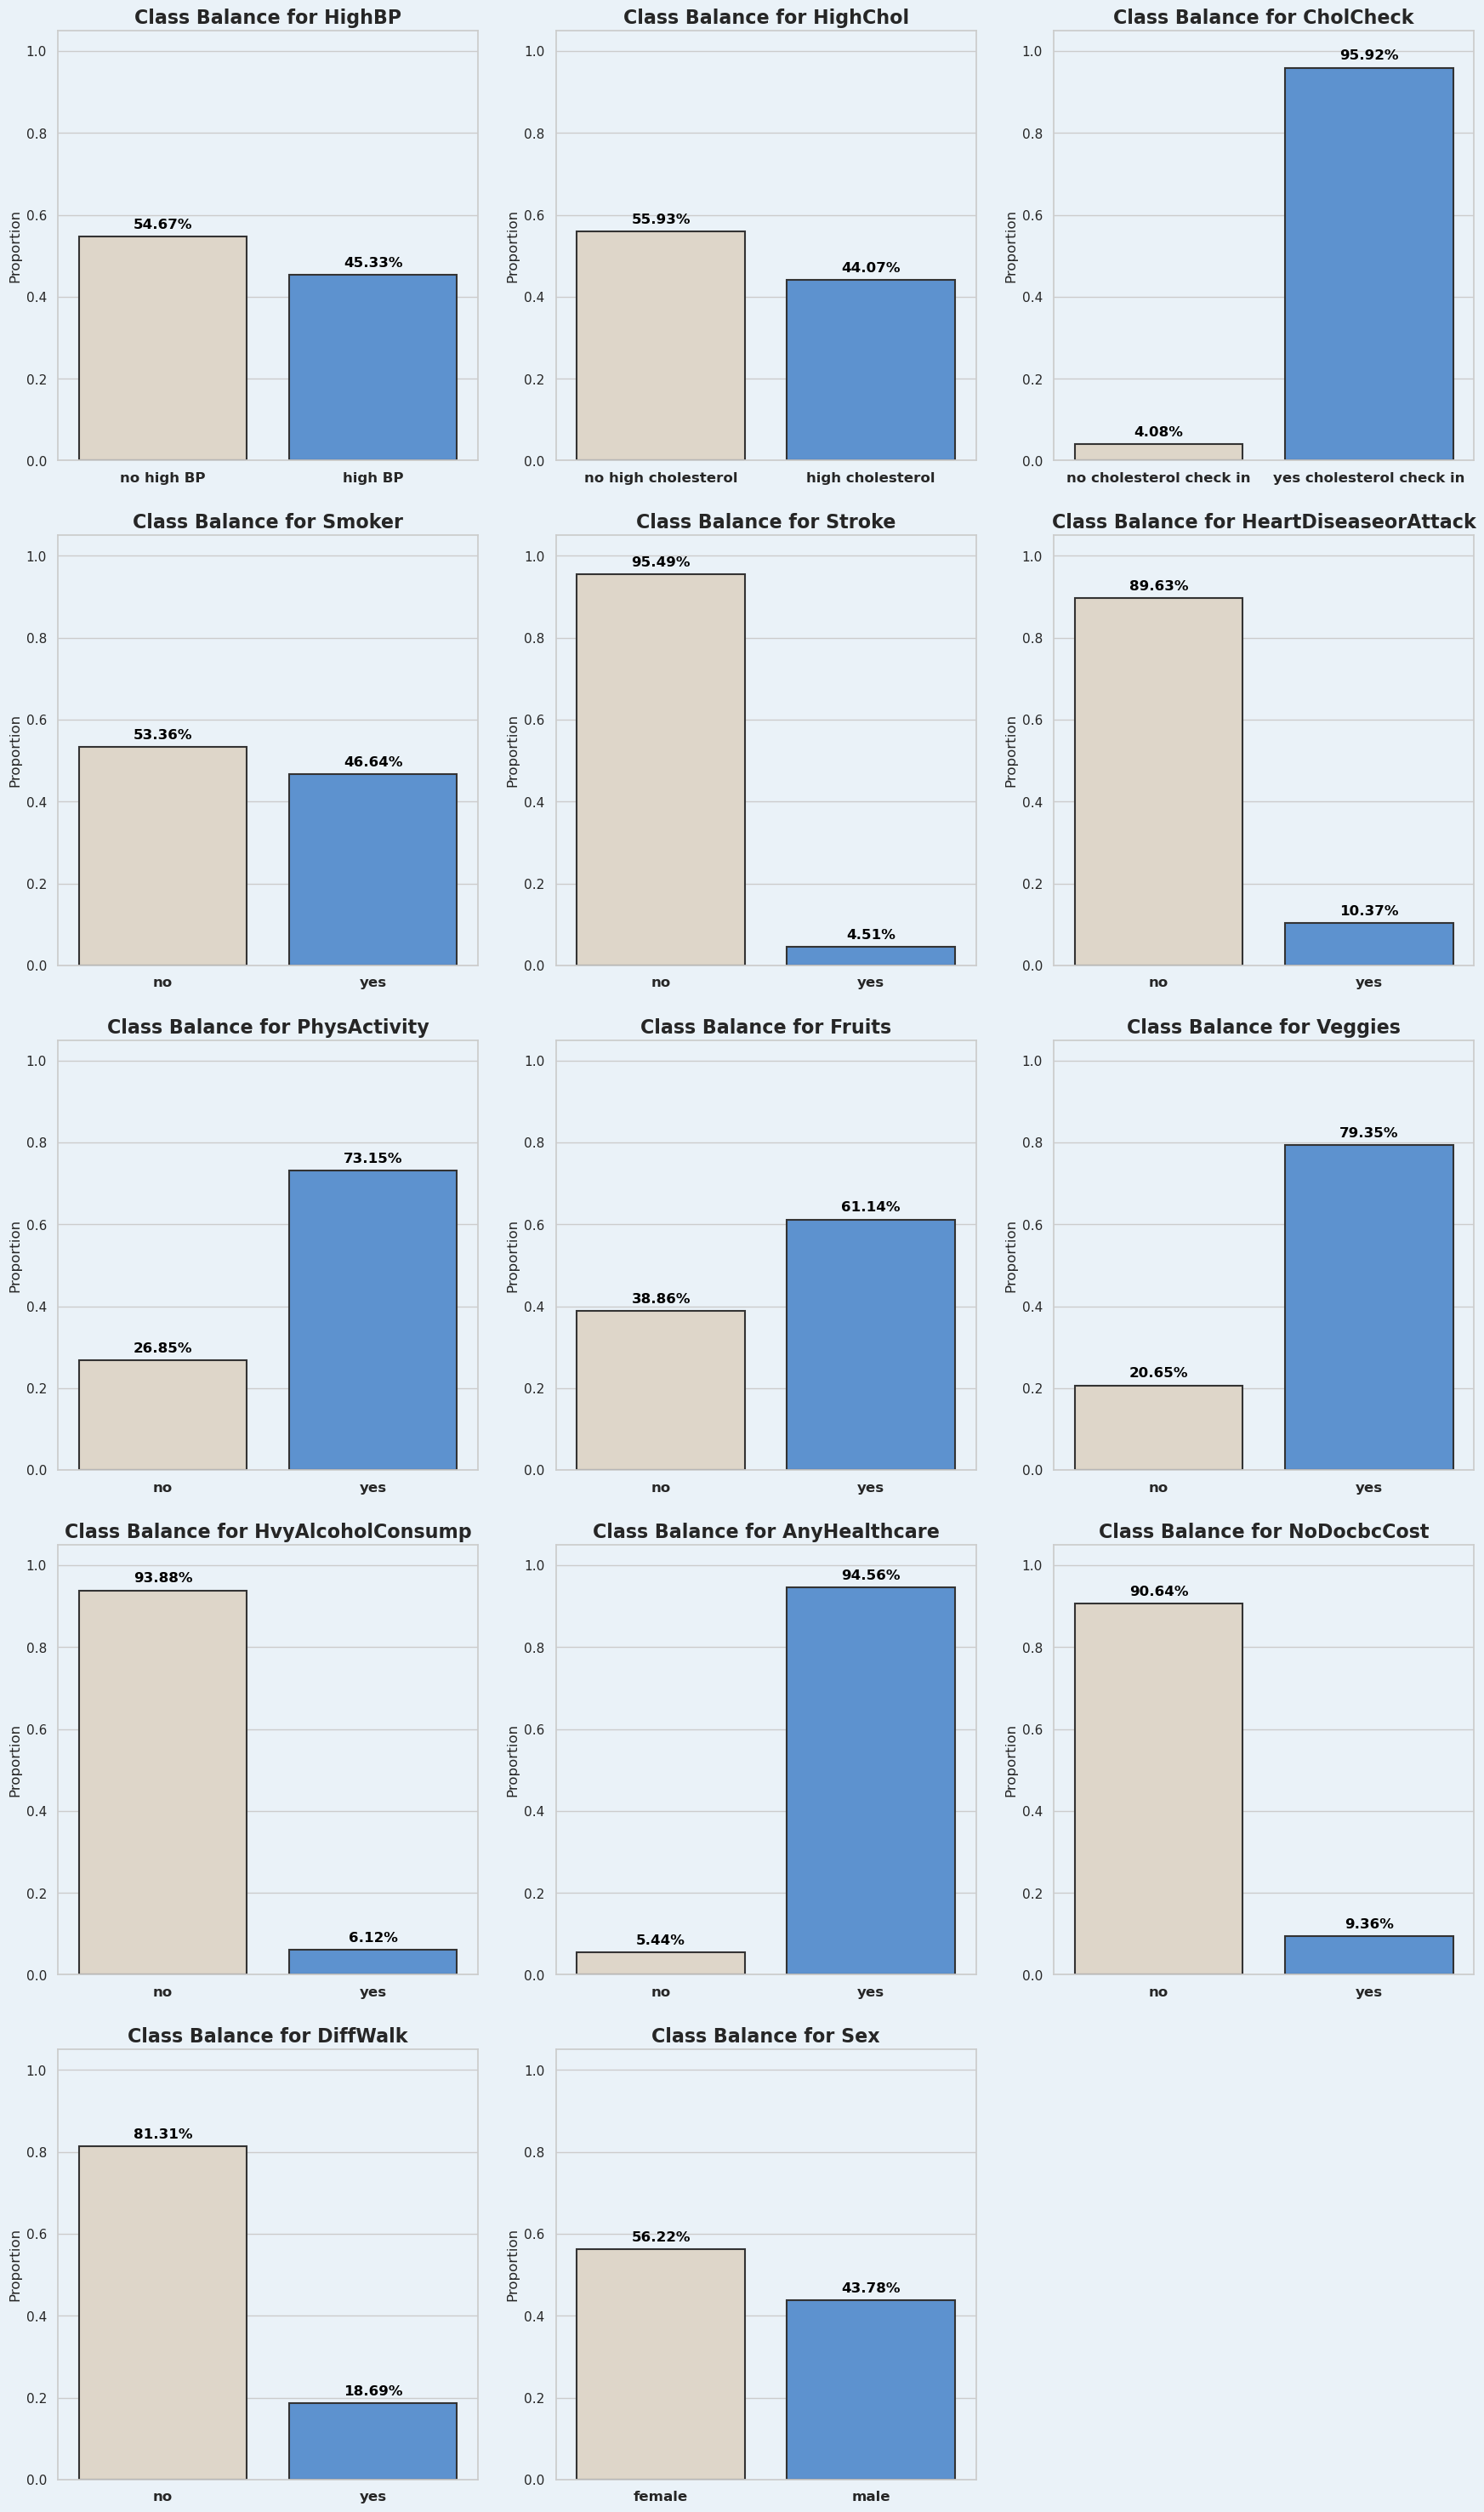

In [275]:
plot_binary_class_balances(bin_cols)

### Analysis of Class Balances

#### HighBP
HighBP shows a fairly even distribution. 

#### HighChol
HighChol shows a fairly even distribution.

#### CholCheck
CholCheck is highly imbalanced, with 95.92% having had a cholesterol check. Important but really hard to balance.

#### Smoker
Smoker is fairly balanced (53.36% no, 46.64% yes).

#### Stroke
Stroke is extremely imbalanced, with only 4.51% reporting a stroke. It is however really useful info.  Can try a drop possibly.

#### HeartDiseaseorAttack
HeartDiseaseorAttack has a notable imbalance (89.63% no, 10.37% yes), but is a critical predictor.

#### PhysActivity
PhysActivity shows a slight imbalance with 73.15% reporting physical activity.  However it is critical.

#### Fruits
Fruits consumption is somewhat imbalanced, with 61.14% reporting daily consumption. Keep as is.

#### Veggies
Veggies consumption is more imbalanced (79.35% yes, 20.65% no). Still critical to keep.

#### HvyAlcoholConsump
Heavy alcohol consumption is highly imbalanced, with only 6.12% reporting it. It is however important to keep.

#### AnyHealthcare
AnyHealthcare is imbalanced, with 94.56% having healthcare coverage. This is a really hard one to call, it could be an indicator for sure though.

#### NoDocbcCost
NoDocbcCost indicates a strong imbalance, with only 9.36% reporting inability to see a doctor due to cost. This is still maybe important but it and AnyHealthCare may be candidates for dropping if model performance is in question.

#### DiffWalk
DiffWalk shows an imbalance where 18.69% report difficulty walking. This is an important feature.

#### Sex
Sex is relatively balanced (56.22% female, 43.78% male), we'll have to see how much of a predictor it is, some diseases are more common in one sex or the other.

## Feature Importance and Correlations

## Interaction Effects